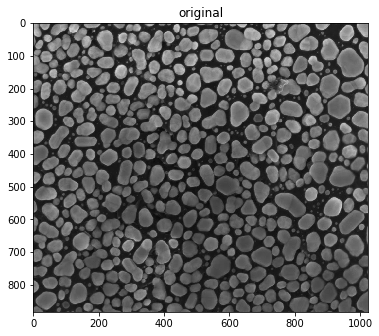

In [10]:
import matplotlib.pyplot as plot
import numpy as np
import Dataset

from Utils import visualize

original = Dataset.easy_large()
visualize(original, 'original')

In [11]:
GRAY = 100
DISTANCE_COEFF = 4
MIN_REG = 4
MAX_REG = 500 

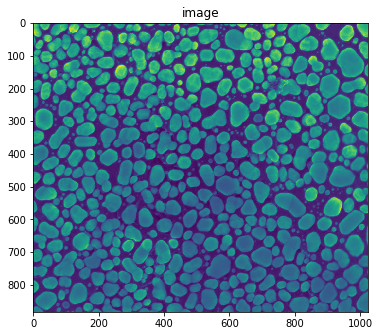

In [12]:
from skimage.color import rgb2gray

image = rgb2gray(original)
image *= (255.0/image.max())        # rescale

visualize(image, 'image')

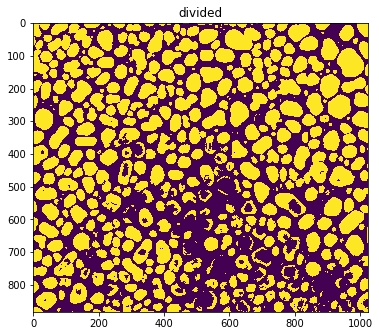

In [13]:
divided = np.full_like(image, 1)

divided[image < GRAY] = 0

visualize(divided, 'divided')

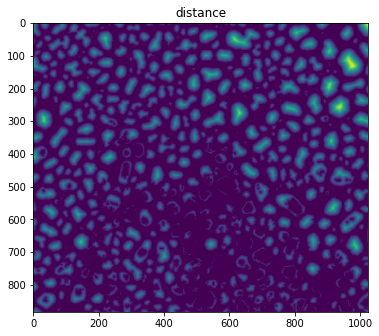

In [14]:
from scipy import ndimage as ndi

distance = ndi.distance_transform_edt(divided)

visualize(distance, 'distance')

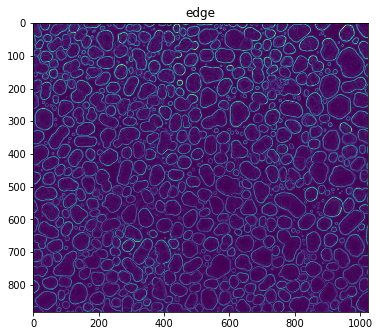

In [15]:
from skimage.filters import sobel

edge = sobel(image)

visualize(edge, 'edge')

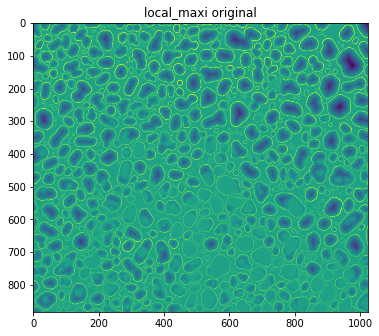

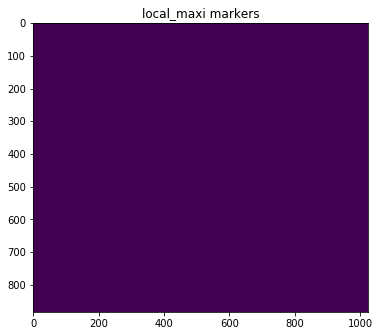

In [16]:
from skimage.feature import peak_local_max

local_maxi_original = -distance * DISTANCE_COEFF + edge
local_maxi = peak_local_max(
    local_maxi_original,
    indices=False,
)
markers = ndi.label(local_maxi)[0]
markers = np.full_like(markers, 1)

visualize(local_maxi_original, 'local_maxi original')
visualize(markers, 'local_maxi markers')

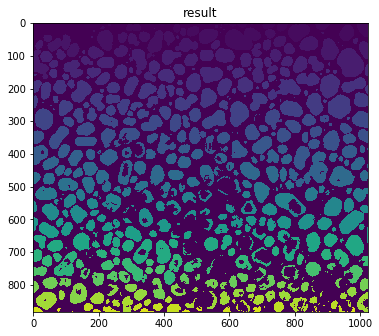

In [17]:
from skimage.morphology import watershed

result = watershed(-distance + edge * 2, markers, mask=divided)
result = ndi.label(result)[0]

visualize(result, 'result')

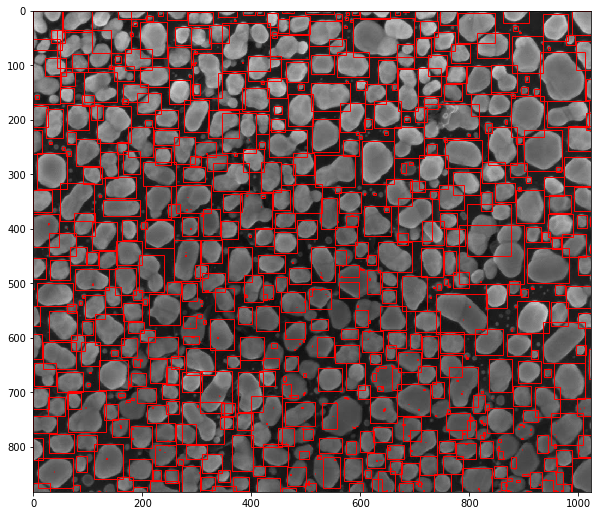

869


In [18]:
from skimage.measure import regionprops
import matplotlib.patches as patches

_, r_plot = plot.subplots(figsize=(10,10)) 
r_plot.imshow(original)


areas = []
counter = 0
for region in regionprops(result):
    if MAX_REG < region.area < MIN_REG:
        continue
        
    areas.append(region.area)
    
    y1, x1, y2, x2 = region.bbox
    rect = patches.Rectangle(
        (x1, y1),
        x2-x1,
        y2-y1,
        fill=False,
        edgecolor='#ff0000ff',
        linewidth=1,
    )
    
    r_plot.add_patch(rect)
    counter += 1

areas = np.array(areas)

plot.show()
print(counter)